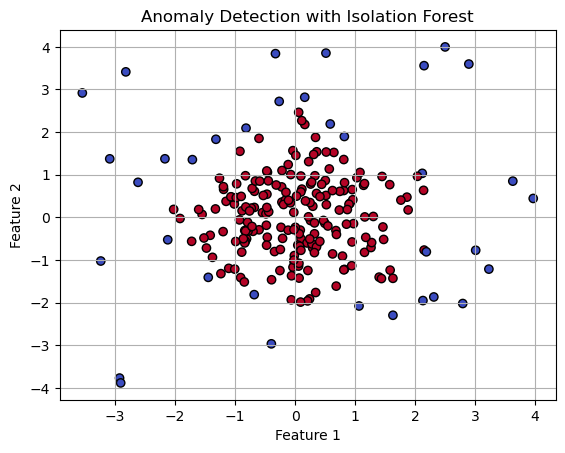

Total anomalies detected: 35


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Generate normal data (Gaussian distribution)
np.random.seed(42)
normal_points = np.random.normal(loc=0, scale=1, size=(200, 2))

# Generate anomalous data (Uniform distribution)
anomalous_points = np.random.uniform(low=-4, high=4, size=(30, 2))

# Combine normal and anomalous data
data = np.vstack([normal_points, anomalous_points])

# Initialize and train the Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.15, random_state=42)
iso_forest.fit(data)

# Predict anomalies (-1 for anomalies, 1 for normal)
predictions = iso_forest.predict(data)

# Visualize normal points and anomalies
plt.scatter(data[:, 0], data[:, 1], c=predictions, cmap='coolwarm', edgecolor='k')
plt.title("Anomaly Detection with Isolation Forest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

# Print the count of detected anomalies
print("Total anomalies detected:", np.sum(predictions == -1))


In [5]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Generate synthetic data for fraud detection
np.random.seed(42)
num_features = 10
normal_samples = 950
fraud_samples = 50

# Normal transactions (Gaussian distribution)
normal_data = np.random.normal(loc=0, scale=1, size=(normal_samples, num_features))
normal_labels = np.zeros(normal_samples)  # Label 0 for normal transactions

# Fraudulent transactions (Uniform distribution)
fraud_data = np.random.uniform(low=-3, high=3, size=(fraud_samples, num_features))
fraud_labels = np.ones(fraud_samples)  # Label 1 for fraudulent transactions

# Combine data and labels
X = np.vstack([normal_data, fraud_data])
y = np.hstack([normal_labels, fraud_labels])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.965

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       190
         1.0       1.00      0.30      0.46        10

    accuracy                           0.96       200
   macro avg       0.98      0.65      0.72       200
weighted avg       0.97      0.96      0.96       200



In [6]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Generate synthetic loan data
np.random.seed(42)
n_samples = 500

# Features: Applicant Income, Credit Score, Loan Amount
income = np.random.normal(loc=50, scale=10, size=n_samples)  # Income in $1000s
credit_score = np.random.normal(loc=700, scale=50, size=n_samples)  # Credit Score
loan_amount = np.random.normal(loc=20, scale=5, size=n_samples)  # Loan Amount in $1000s

# Combine the features into a dataset
X = np.column_stack((income, credit_score, loan_amount))

# Scale the data to standardize feature ranges
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the Isolation Forest for anomaly detection
iso_forest = IsolationForest(n_estimators=150, contamination=0.05, random_state=42)
iso_forest.fit(X_scaled)

# Predict anomalies (-1 indicates a potential loan default)
anomaly_predictions = iso_forest.predict(X_scaled)
anomaly_scores = iso_forest.decision_function(X_scaled)

# Output results
print("Number of potential loan defaults detected:", np.sum(anomaly_predictions == -1))
print("Anomaly Scores (first 5 samples):", anomaly_scores[:5])


Number of potential loan defaults detected: 25
Anomaly Scores (first 5 samples): [0.11966697 0.08210106 0.13200181 0.12168128 0.15094543]
